In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
from scipy.io import wavfile
import soundfile

from nnAudio import Spectrogram # If you don't have nnAudio, you can simply do pip install nnAudio

os.environ['CUDA_VISIBLE_DEVICES']='0' # Choosing which GPU to use

if torch.cuda.is_available(): # Use GPU when it is avaliable
    device = "cuda:0"

In [2]:
audio_array = np.load('./y_list.npy')

In [3]:
mel_layer = Spectrogram.MelSpectrogram(sr=44100, n_fft=2048, n_mels=128, hop_length=512, fmax=1500)

STFT filter created, time used = 4.2523 seconds
Mel filter created, time used = 0.0038 seconds


In [5]:
y_torch = torch.tensor(audio_array, dtype=torch.float).to(device)

In [6]:
spec = mel_layer(y_torch)

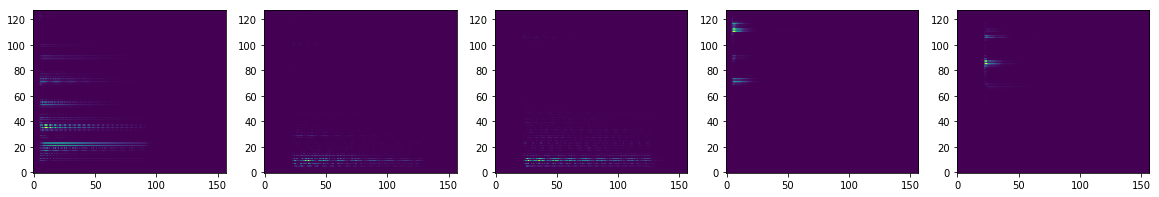

In [7]:
fig, ax = plt.subplots(1,5, figsize=(20,3))
for i in range(5):
    ax[i].imshow(spec[i].cpu().numpy(),aspect='auto', origin='lower')